# 분류

## #01. 분류와 군집의 차이

분류와 군집은 모두 데이터를 특정한 집단으로 나눈다는 점에서 공통점이 있다.

| 이름 | 설명 | 구분 | 알고리즘 |
|---|---|---|---|
| 분류 | 소속집단의 정보를 이미 알고 있는 상태에서 새로운 데이터를 비슷한 집단으로 묶는 방법 | 지도학습 | KNN | 
| 군집 | 소속집단의 정보가 없는 상타에서 비슷한 집단으로 묶는 방법 | 비지도학습 | K-means |
## #02. 분류 예제 
> 산점도 그래프의 위쪽에 분포한 녹색점은 진돗개이고, 아래쪽에 붉은 점은 닥스훈트임

### 1. K-NN 알고리즘(K 최근접 이웃)

특정 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결의 방식으로 데이터 레이블을 할당하는 분류 방식

### 2. K-NN의 특징

- K-NN 알고리즘은 k의 값에 따라 결과가 달라진다
- 단순히 이웃의 수를 계산하는 것이 아니라, 이웃과의 거리에 가중치를 부여하는 모델을 만들 수 있다. 
- 알고리즘이 매우 단순하고 직관적임.
## #03. 패키지 참조


In [14]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier



## #04. 데이터 가져오기

In [5]:
origin = pd.read_excel('https://data.hossam.kr/G02/dogs.xlsx')
origin.head()

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33


## #05. 데이터 분포확인


In [11]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(5,5))



<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

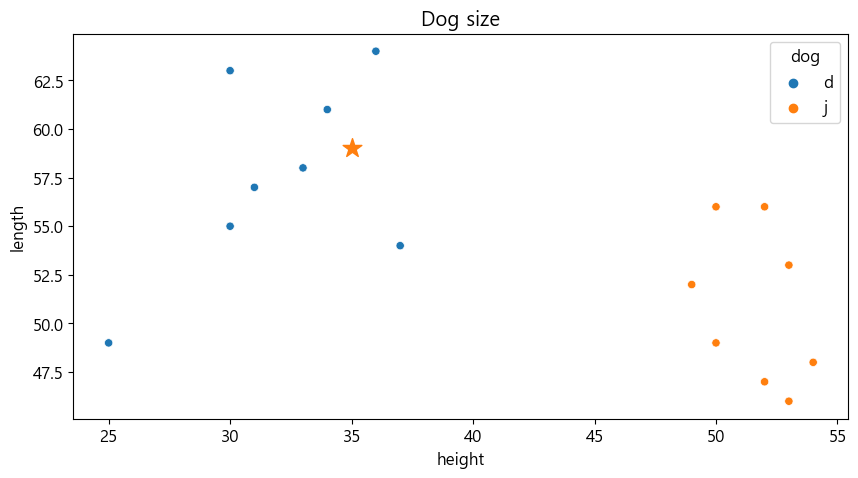

In [13]:
sb.scatterplot(data=origin,x='height',y='length',hue='dog')
plt.xlabel('height')
plt.ylabel('length')
plt.title('Dog size')

# 새로운 데이터
newdata_length = [59]
newdata_height = [35]

plt.scatter(newdata_height,newdata_length,marker='*',s=200)


plt.show()
plt.close()


## #06. K-NN 분류모델 구성
### 종속변수 라벨링

In [15]:
origin.head()

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33


In [16]:
df= origin.copy()
df['dog'] = origin['dog'].map({'d':0,'j':1})
df.head()

,dog,length,height
0,0,55,30
1,0,57,31
2,0,64,36
3,0,63,30
4,0,58,33


### 독립 & 종속변수 분리

In [17]:
x = df.drop('dog',axis=1)
y= df[['dog']]


In [18]:
y.head()

,dog
0,0
1,0
2,0
3,0
4,0
